In [ ]:
import tensorflow as tf

#We need to import the following
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("y_train.shape", y_train.shape)
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
y_train.shape (50000, 1)
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train.flatten()))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
#Stage1
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
#Stage2
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              118067

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 22s 8ms/step - loss: 1.5743 - accuracy: 0.4231 - val_loss: 1.3217 - val_accuracy: 0.5176
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2725 - accuracy: 0.5416 - val_loss: 1.1452 - val_accuracy: 0.5887
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1359 - accuracy: 0.5953 - val_loss: 1.0402 - val_accuracy: 0.6278
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0463 - accuracy: 0.6285 - val_loss: 0.9941 - val_accuracy: 0.6490
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9713 - accuracy: 0.6550 - val_loss: 0.9495 - val_accuracy: 0.6631
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9204 - accuracy: 0.6733 - val_loss: 0.8919 - val_accuracy: 0.6878
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8666 - accuracy: 0.6913 - val_loss: 0.9186 - val_ac

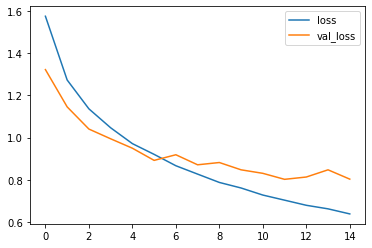

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

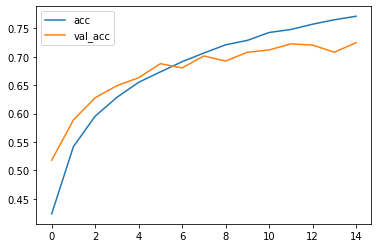

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,y_pred)
print("               Predicted Label")
print(cm)

               Predicted Label
[[755  29  48  11  22   2  18  11  69  35]
 [ 15 858   4   4   4   3  13   7  28  64]
 [ 58   2 592  47 131  41  76  24  20   9]
 [ 18   9  72 463 100 167 108  29  17  17]
 [ 21   2  52  37 743  26  45  57  12   5]
 [ 12   1  58 131  81 595  55  46  11  10]
 [  3   6  23  24  55  18 852   5  11   3]
 [ 16   3  30  28  64  45  12 786   5  11]
 [ 62  25  17  13  11   4  12   5 830  21]
 [ 24 100   9  17   6   6  15  15  34 774]]


In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

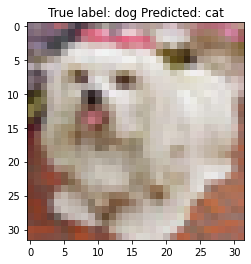

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]));